In [1]:
# !pip install pandas==1.5.1
# !pip install pyLDAvis==3.4.0
# !pip install gensim==4.3.1

## 1. Data Loading 

In [2]:
import pandas as pd
# df = pd.read_csv("./data/yelp_data.csv")

ca_file_path = '../data/ca_restaurants.csv'
ca_df = pd.read_csv(ca_file_path)
ca_df

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours,is_restaurant
0,1375,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06.000000000,...,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'},Y
1,1376,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59.000000000,...,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'},Y
2,1377,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35.000000000,...,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'},Y
3,1378,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38.000000000,...,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'},Y
4,1379,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54.000000000,...,93101,34.416984,-119.695556,3.5,488,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Steakhouses, Sushi Bars, Restaurants, Japanese",{'Monday': '0:0-0:0'},Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247608,6990221,cKuP5pnvbvpn4UbaccVcdg,OVYb1El25BgVhgbXb4e-KA,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,Great experience with great people who are rea...,2021-06-22 21:41:07.000000000,...,93101,34.429487,-119.706043,5.0,5,1,NaN,"Tours, Walking Tours, Hotels & Travel, Archite...","{'Friday': '20:0-22:0', 'Saturday': '10:0-23:3...",Y
247609,6990222,dZC87sZ1f2ntOf876_DDLg,9w5PoliouEyNikdy6DizqQ,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,I spent the week in Santa Barbara and had the ...,2021-06-28 23:53:44.000000000,...,93101,34.429487,-119.706043,5.0,5,1,NaN,"Tours, Walking Tours, Hotels & Travel, Archite...","{'Friday': '20:0-22:0', 'Saturday': '10:0-23:3...",Y
247610,6990223,NCafkcXIvK7E965my4RpQg,GmuHOkMR80oW3sAuF-UsAw,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,"Last summer, I had the pleasure of experiencin...",2021-07-06 19:15:56.000000000,...,93101,34.429487,-119.706043,5.0,5,1,NaN,"Tours, Walking Tours, Hotels & Travel, Archite...","{'Friday': '20:0-22:0', 'Saturday': '10:0-23:3...",Y
247611,6990224,VxsNftGxRUDZcLD0Ns1wKg,VRXPOvlSydho0tYmSseKnQ,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,Joseph and Teresa are super hosts. You will f...,2021-07-01 03:44:10.000000000,...,93101,34.429487,-119.706043,5.0,5,1,NaN,"Tours, Walking Tours, Hotels & Travel, Archite...","{'Friday': '20:0-22:0', 'Saturday': '10:0-23:3...",Y


### 2. Data Exploration
Data exploration includes 2 part: 
1. Flatten attributes inside column "Attributes" to new columns for validation purpose; 
2. Check Emojis in the text column

In [3]:
#Flatten "Attributes" and add to new columns"
import ast
from pandas import json_normalize
ca_df['attributes'] = ca_df['attributes'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
#  flatten Json 
flattened_attributes = json_normalize(ca_df['attributes'])
# Combine the flattened attributes with the original DataFrame
ca_df = pd.concat([ca_df, flattened_attributes], axis=1)
for column in ['Ambience', 'GoodForMeal']:
    ca_df[column] = ca_df[column].fillna('{}')
    ca_df[column] = ca_df[column].apply(ast.literal_eval)
    flattened_attributes = json_normalize(ca_df[column])
    ca_df = pd.concat([ca_df, flattened_attributes], axis=1)
ca_df = ca_df.drop(['attributes','Ambience', 'GoodForMeal'], axis=1)
ca_df

/opt/homebrew/Caskroom/miniconda/base/envs/capstone-proj/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/opt/homebrew/Caskroom/miniconda/base/envs/capstone-proj/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,intimate,romantic,classy,upscale,dessert,latenight,lunch,dinner,brunch,breakfast
0,1375,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06.000000000,...,False,False,True,False,False,False,True,True,False,False
1,1376,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59.000000000,...,False,False,True,False,False,False,True,True,False,False
2,1377,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35.000000000,...,False,False,True,False,False,False,True,True,False,False
3,1378,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38.000000000,...,False,False,True,False,False,False,True,True,False,False
4,1379,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54.000000000,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247608,6990221,cKuP5pnvbvpn4UbaccVcdg,OVYb1El25BgVhgbXb4e-KA,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,Great experience with great people who are rea...,2021-06-22 21:41:07.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247609,6990222,dZC87sZ1f2ntOf876_DDLg,9w5PoliouEyNikdy6DizqQ,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,I spent the week in Santa Barbara and had the ...,2021-06-28 23:53:44.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247610,6990223,NCafkcXIvK7E965my4RpQg,GmuHOkMR80oW3sAuF-UsAw,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,"Last summer, I had the pleasure of experiencin...",2021-07-06 19:15:56.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247611,6990224,VxsNftGxRUDZcLD0Ns1wKg,VRXPOvlSydho0tYmSseKnQ,XPkkWyAkkPeH-PqXmBMmpg,5,0,0,0,Joseph and Teresa are super hosts. You will f...,2021-07-01 03:44:10.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Calculate non-empty value rate for each of the column. We will take below 25% missing rate for consideration.
total_counts = ca_df.isin(['None']).sum() + ca_df.isna().sum()
non_Empty_rate = 1-total_counts/ca_df.shape[0]
non_Empty_rate

Unnamed: 0     1.000000
review_id      1.000000
user_id        1.000000
business_id    1.000000
stars_x        1.000000
                 ...   
latenight      0.653992
lunch          0.609847
dinner         0.682266
brunch         0.551207
breakfast      0.619564
Length: 74, dtype: float64

In [5]:
%%time
import emot
emot_obj = emot.core.emot()
emojis = []
for text in ca_df['text']:
    emos = emot_obj.emoji(text)
    if len(emos.get('value')) >= 1:
        print(emos.get('value'))
    else:
        emojis.append(None)

['‼']
['™']
['‼']
['‼']
['‼']
['®']
['‼']
['®']
['‼']
['™']
['‼', '‼']
['‼']
['™']
['‼', '‼', '‼']
['‼']
['‼', '‼']
['‼']
['™']
['‼']
['‼']
['‼', '‼']
CPU times: user 2min 59s, sys: 513 ms, total: 3min
Wall time: 3min


In our sentiment analysis, we took into consideration the handling of emojis. Emojis, to some extent, convey emotions, so we believed they could help on our analysis. However, during the initial processing, we only catched :bangbang:, ®, ™. Emojis observed didn't contribute significantly to expressing emotions. Therefore, in this analysis, we chose to filter out emojis as they were not deemed impactful.

## 3.Data pre-processing
Text need to consider some cases. We will perform the following steps: 
###### 1). To Lower Case
###### 2). Tokenization 
###### 3). Remove Stopwords 
###### 4). Remove URL, Emails, Special Chars
###### 5). Stemming/Lemmatization
###### 6). Replace food related entities (sushi, roll, ) by a gernal word 'food'. 

In [6]:
%%time
from gensim.parsing.preprocessing import preprocess_string
# This method from gensim automatically does the 5 steps above. Note this method also remove Emoji.
ca_df['tokens'] = ca_df['text'].apply(lambda x :preprocess_string(x) ) # This method automatically does the 5 steps above
ca_df.head()

CPU times: user 38 s, sys: 541 ms, total: 38.5 s
Wall time: 38.7 s


,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,romantic,classy,upscale,dessert,latenight,lunch,dinner,brunch,breakfast,tokens
0,1375,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06.000000000,...,False,True,False,False,False,True,True,False,False,"[parti, hibachi, waitress, brought, separ, sus..."
1,1376,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59.000000000,...,False,True,False,False,False,True,True,False,False,"[sat, half, hour, miso, drink, serv, wait, act..."
2,1377,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35.000000000,...,False,True,False,False,False,True,True,False,False,"[bad, sushi, roll, good, option, limit, hibach..."
3,1378,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38.000000000,...,False,True,False,False,False,True,True,False,False,"[picki, come, sushi, qualiti, fish, ingredi, i..."
4,1379,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54.000000000,...,False,True,False,False,False,True,True,False,False,"[sushi, master, actual, asian, good, sushi, pr..."


### 4.LDA and NMF Topic Modelling

For LDA and NMF model, we do 4 steps for each model. 1) Create dictionary and corpus for model; 2) build Model 3) plot Coherence plot for different topic number to find optimal topic number; 4) Combined with topic number and extracted topics, find optimized model. 5) Visualize the topics

In [7]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import Nmf

random_state = 42


# Step 1: Create Dictionary and Bow Corpus
dictionary = gensim.corpora.Dictionary(ca_df['tokens'])
#filter extreme conditions
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in ca_df['tokens']]
corpus

# Step 2: Build Topic Model
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=dictionary,
#                                        num_topics=15, 
#                                        random_state=random_state,
#                                        chunksize=2000,
#                                        passes=20,
#                                        workers=3)



[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 2),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 2),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(1, 1),
  (5, 1),
  (20, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2)],
 [(9, 1),
  (10, 1),
  (30, 1),
  (40, 2),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 2),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 3),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 3)],
 [(3, 1),
  (16, 1),
  (30, 2),
  (49, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),

In [8]:
# Step 3: Find the Optimal Number of Topics
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
def compute_coherence_values(modelname, dictionary, corpus, texts, start, limit, step):
    """
    helper function
    return 2 lists: 1. list for model; 2. list for coherence vaules
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        if modelname == "LDA":
            cur_model = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                         num_topics=num_topics,
                         random_state=random_state,
                         chunksize=2000,
                         passes=20,
                         workers=3)
        elif modelname == 'NMF':
            cur_model = Nmf(corpus=corpus,
                        id2word=dictionary,
                         num_topics=num_topics,
                         random_state=random_state,
                         chunksize=2000,
                         passes=20)
        model_list.append(cur_model)
        coherencemodel = CoherenceModel(model=cur_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_coherences_topics(modelName, start, limit, step, model_list, coherence_values):
    """
    Create a plot as shown above of coherence for the topic models created with num_topics
    """
    for m, cv in zip(range(start, limit, step), coherence_values):
        print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
    # Select the model and number of topics with the highest coherence score
    max_coherence_value = max(coherence_values)
    optimal_index = coherence_values.index(max_coherence_value)
    optimal_model = model_list[optimal_index]
    optimal_num_topics = optimal_index*step + start
    print("Optimal Number of Topics:", optimal_num_topics)
    
    # Step 4: Print the Topics of the Optimal Model
    topics = optimal_model.print_topics(num_words=15)
    for topic in topics:
        print(topic)
    x = range(start, limit, step)  # Number of topics
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.title("Coherence Score vs Number of Topics for " + modelName + " model")
    plt.xticks(x)  # Show all the x-ticks (number of topics)
    plt.show()

When choosing the number of topics for LDA or NMF model, it's important to consider both the coherence scores and domain knowledge or human intuition. From the review dataset, we know there are multiple aspects to talk about. Therefore, I prefer a larger topic number rather than a smaller one. Let try to plot the coherence scores from 10 to 30 topics

##### LDA model

Let's find the optimal topic number by coherence score

In [9]:
LDA_model_list, LDA_coherence_values = compute_coherence_values(modelname="LDA", dictionary=dictionary, corpus=corpus, texts=ca_df['tokens'], start=10, limit=30, step=2)

Num Topics = 10  has Coherence Value of 0.4667
Num Topics = 12  has Coherence Value of 0.4857
Num Topics = 14  has Coherence Value of 0.4954
Num Topics = 16  has Coherence Value of 0.505
Num Topics = 18  has Coherence Value of 0.5223
Num Topics = 20  has Coherence Value of 0.5188
Num Topics = 22  has Coherence Value of 0.503
Num Topics = 24  has Coherence Value of 0.515
Num Topics = 26  has Coherence Value of 0.5379
Num Topics = 28  has Coherence Value of 0.5179
Optimal Number of Topics: 26
(17, '0.020*"custom" + 0.016*"ask" + 0.015*"order" + 0.015*"said" + 0.013*"manag" + 0.013*"time" + 0.013*"servic" + 0.011*"told" + 0.010*"peopl" + 0.010*"work" + 0.009*"want" + 0.009*"know" + 0.008*"call" + 0.008*"rude" + 0.008*"like"')
(10, '0.122*"fri" + 0.113*"burger" + 0.024*"dog" + 0.023*"onion" + 0.017*"mesa" + 0.017*"chees" + 0.015*"ring" + 0.015*"bun" + 0.013*"hot" + 0.012*"order" + 0.011*"baklava" + 0.010*"sweet" + 0.010*"good" + 0.010*"potato" + 0.009*"scott"')
(23, '0.032*"chicken" + 0.02

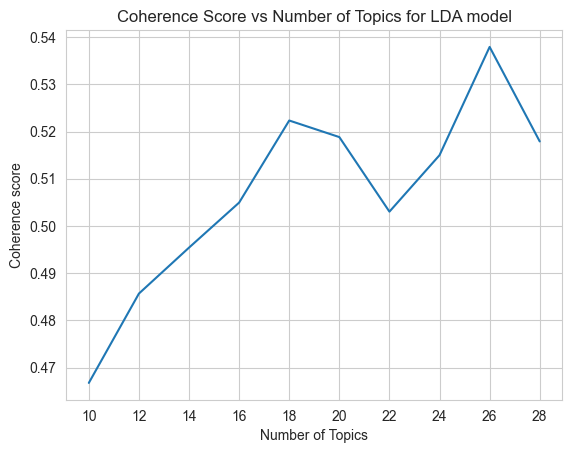

In [10]:
plot_coherences_topics("LDA", 10, 30, 2, LDA_model_list, LDA_coherence_values)

We extract the topics names by chatGPT and validated by manually inspection
Here is the topic name for topics:

Topic 4: Barbecue and Meat Dishes
Topic 2: Hotel and Accommodation
Topic 8: Restaurant and **Dining Experience**
Topic 3: Bars and **Nightlife**
Topic 9: Disappointing **Food and Service**
Topic 19: **Celebrations and Events**
Topic 23: Asian Cuisine
Topic 1: **Great Food and Service** in Santa Barbara
Topic 21: Mexican Cuisine
Topic 14: Sandwiches and Salads
Topic 5: **Fine Dining**
Topic 12: **Vegan and Health-Conscious Options**
Topic 17: Customer Service Issues
Topic 18: Local Businesses and Markets
Topic 15: **Outdoor Seating and Parking**
Topic 24: **Good Food and Value**
Topic 11: Desserts and Sweets
Topic 20: Wine Tasting and Tours
Topic 16: Sushi and Japanese Cuisine
Topic 0: **Seafood and Ocean Views**
--------------------------------------------------
The aspects are able to extracted are highlighted by bold. Rest of topics are more about a specific cuisine. Like BBQ, Mexican cuisine, Pizza. To resolve the problem topics are more cuisine oriented, we replace words around Cuisines by a general word "food"

In [11]:
%time
from gensim.parsing.preprocessing import preprocess_string
# to resolve the problem topics are more cuisine oriented, we replace words around Cuisines by a general word "food"
food_labels_set = ['fish', "sushi", "roll", "seafood", "crab", "fresh", "shrimp", "lobster" , "clam", "taco", "burrito", "salsa", "mexican","indian", "chip", "pizza", "vegan", "chicken", "sandwich", "fri", "burger", "salad", "chees","bread", "donut", "chocol", "coffe", "ic", "cream" , "salmon", "ahi", "ramen", "octopu", "egg", "toast", "potato", "bacon",  "pancak", "meat", "grill", "hibachi", "wing","pork","steak", "rib","chowder", "oyster"]
ca_df['tokens_removed_labels'] = ca_df['tokens'].apply(lambda x: [word if word not in food_labels_set else "food" for word in x])
ca_df.head()

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs


,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,classy,upscale,dessert,latenight,lunch,dinner,brunch,breakfast,tokens,tokens_removed_labels
0,1375,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06.000000000,...,True,False,False,False,True,True,False,False,"[parti, hibachi, waitress, brought, separ, sus...","[parti, food, waitress, brought, separ, food, ..."
1,1376,_Ub20uO1MKy4XOVPOdzpqw,lUYboGI6aFbZ0dX27pijpA,gebiRewfieSdtt17PTW6Zg,1,0,2,0,"Sat down over a half hour, only miso and drink...",2017-06-28 01:04:59.000000000,...,True,False,False,False,True,True,False,False,"[sat, half, hour, miso, drink, serv, wait, act...","[sat, half, hour, miso, drink, serv, wait, act..."
2,1377,-DjIfoNFAiT5J4kF9hXocQ,SrfDRvGKI8FQq9LCr0dQuQ,gebiRewfieSdtt17PTW6Zg,3,9,4,6,Not bad. Sushi roll was good but options were ...,2017-01-14 23:31:35.000000000,...,True,False,False,False,True,True,False,False,"[bad, sushi, roll, good, option, limit, hibach...","[bad, food, food, good, option, limit, food, f..."
3,1378,URe-2Zlv7RoY4Ycr9JYVWw,SfMf7DEX7xT82OCcbZFsgQ,gebiRewfieSdtt17PTW6Zg,5,1,0,1,I'm very picky when it comes to Sushi. Quality...,2016-07-14 23:09:38.000000000,...,True,False,False,False,True,True,False,False,"[picki, come, sushi, qualiti, fish, ingredi, i...","[picki, come, food, qualiti, food, ingredi, im..."
4,1379,tHP5ihPd_W9OzfkKEWdIwA,aH3AH7V9g60w4pt3LpJ1_Q,gebiRewfieSdtt17PTW6Zg,4,0,0,0,Even though the sushi masters are not actually...,2014-11-30 07:35:54.000000000,...,True,False,False,False,True,True,False,False,"[sushi, master, actual, asian, good, sushi, pr...","[food, master, actual, asian, good, food, pric..."


In [12]:
import gensim
from gensim.models import Nmf
from gensim.corpora.dictionary import Dictionary
from gensim.models import CoherenceModel
#1.Create Dictionary and Bow Corpus for post-processed text
# Create a corpus from a list of texts
random_state = 42
dictionary_removed_labels = gensim.corpora.Dictionary(ca_df['tokens_removed_labels'])
#filter extreme conditions
dictionary_removed_labels.filter_extremes(no_below=5, no_above=0.5)
corpus_removed_labels = [dictionary_removed_labels.doc2bow(text) for text in ca_df['tokens_removed_labels']]


In [13]:

LDA_model_list, LDA_coherence_values = compute_coherence_values(modelname="LDA",dictionary=dictionary_removed_labels, corpus=corpus_removed_labels, texts=ca_df['tokens_removed_labels'], start=18, limit=31, step=1)

Num Topics = 18  has Coherence Value of 0.4897
Num Topics = 19  has Coherence Value of 0.5025
Num Topics = 20  has Coherence Value of 0.4922
Num Topics = 21  has Coherence Value of 0.5239
Num Topics = 22  has Coherence Value of 0.4871
Num Topics = 23  has Coherence Value of 0.492
Num Topics = 24  has Coherence Value of 0.4978
Num Topics = 25  has Coherence Value of 0.5173
Num Topics = 26  has Coherence Value of 0.5188
Num Topics = 27  has Coherence Value of 0.5016
Num Topics = 28  has Coherence Value of 0.5085
Num Topics = 29  has Coherence Value of 0.5182
Num Topics = 30  has Coherence Value of 0.5034
Optimal Number of Topics: 21
(20, '0.060*"street" + 0.056*"park" + 0.052*"locat" + 0.043*"state" + 0.020*"lot" + 0.017*"walk" + 0.015*"right" + 0.013*"shop" + 0.012*"drive" + 0.012*"stop" + 0.011*"lunch" + 0.011*"coast" + 0.010*"beach" + 0.010*"easi" + 0.010*"spot"')
(9, '0.101*"great" + 0.056*"good" + 0.055*"place" + 0.051*"servic" + 0.043*"friendli" + 0.029*"staff" + 0.028*"nice" + 0.0

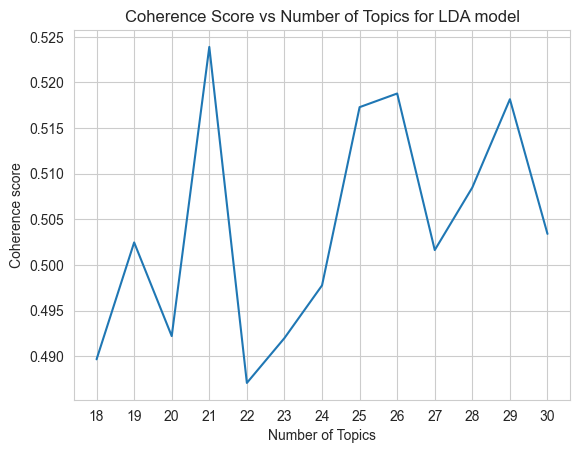

In [14]:
plot_coherences_topics("LDA", 18, 31, 1, LDA_model_list, LDA_coherence_values)

In [24]:
# Mannually inspect several topic, see which topic number make more sense to human 
LDA_topic_num_list = [ 21, 25, 26, 28, 29]
for idx in LDA_topic_num_list:
    model = LDA_model_list[idx - 18]
    print("="*20)
    print("Topic Number: ", idx)
    sorted_topics = sorted(model.print_topics(num_words=15), key=lambda x: x[0])

# Print the sorted topics
    for topic in sorted_topics:
        print(topic)

Topic Number:  21
(0, '0.058*"place" + 0.031*"time" + 0.030*"love" + 0.025*"best" + 0.021*"come" + 0.021*"amaz" + 0.021*"good" + 0.021*"try" + 0.015*"definit" + 0.014*"eat" + 0.013*"delici" + 0.013*"great" + 0.010*"favorit" + 0.010*"recommend" + 0.010*"dai"')
(1, '0.027*"rice" + 0.025*"soup" + 0.024*"spici" + 0.023*"dish" + 0.023*"noodl" + 0.021*"thai" + 0.020*"order" + 0.016*"good" + 0.015*"curri" + 0.015*"flavor" + 0.013*"restaur" + 0.013*"like" + 0.013*"bowl" + 0.012*"chines" + 0.011*"beef"')
(2, '0.022*"sauc" + 0.022*"flavor" + 0.014*"delici" + 0.011*"onion" + 0.011*"perfect" + 0.011*"perfectli" + 0.010*"sweet" + 0.010*"tomato" + 0.009*"cook" + 0.009*"dish" + 0.008*"crispi" + 0.007*"order" + 0.007*"nice" + 0.007*"mushroom" + 0.007*"serv"')
(3, '0.048*"seat" + 0.045*"outsid" + 0.043*"patio" + 0.034*"view" + 0.030*"outdoor" + 0.026*"sit" + 0.026*"nice" + 0.024*"tabl" + 0.023*"insid" + 0.021*"great" + 0.020*"beach" + 0.019*"enjoi" + 0.017*"area" + 0.016*"beauti" + 0.014*"place"')
(5, 

In [37]:
# by inspection, we take topic number 21 for the optimal model
LDA_optimal_model = LDA_model_list[29 - 18]
LDA_optimal_model.top_topics(corpus_removed_labels)

[([(0.04562399, 'seat'),
   (0.040119026, 'outsid'),
   (0.037822854, 'patio'),
   (0.030373966, 'nice'),
   (0.030170957, 'tabl'),
   (0.026543, 'outdoor'),
   (0.02498242, 'sit'),
   (0.02432727, 'insid'),
   (0.023400865, 'place'),
   (0.02043435, 'area'),
   (0.01502904, 'great'),
   (0.013681645, 'enjoi'),
   (0.013642715, 'love'),
   (0.013226499, 'dog'),
   (0.012556786, 'littl'),
   (0.011394702, 'like'),
   (0.011105308, 'good'),
   (0.010791063, 'space'),
   (0.009674681, 'friendli'),
   (0.009295655, 'lot')],
  -1.8147544606283017),
 ([(0.061233252, 'place'),
   (0.034169007, 'best'),
   (0.034055717, 'love'),
   (0.026104178, 'good'),
   (0.024992889, 'amaz'),
   (0.02398206, 'try'),
   (0.02231529, 'time'),
   (0.021432666, 'come'),
   (0.015774947, 'eat'),
   (0.014485579, 'like'),
   (0.014142576, 'delici'),
   (0.01395702, 'definit'),
   (0.013604733, 'favorit'),
   (0.01113129, 'town'),
   (0.010366609, 'thing'),
   (0.0097056525, 'want'),
   (0.009659787, 'great'),
  

alpha and eta are hyperparameters that affect sparsity of the document-topic (theta) and topic-word (lambda) distributions. We will let these be the default values for now(default value is 1/num_topics)

Alpha is the per document topic distribution.

High alpha: Every document has a mixture of all topics(documents appear similar to each other).
Low alpha: Every document has a mixture of very few topics
Eta is the per topic word distribution.

High eta: Each topic has a mixture of most words(topics appear similar to each other).
Low eta: Each topic has a mixture of few words.

We set as auto.

In [38]:
print("Alpha:", LDA_optimal_model.alpha)
print("Eta:", LDA_optimal_model.eta)

Alpha: [0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]
Eta: [0.03448276 0.03448276 0.03448276 ... 0.03448276 0.03448276 0.03448276]


###### Visualize LAD model result

In [39]:

import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(LDA_optimal_model, corpus_removed_labels, dictionary_removed_labels)
p


/opt/homebrew/Caskroom/miniconda/base/envs/capstone-proj/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/homebrew/Caskroom/miniconda/base/envs/capstone-proj/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
23    -0.196051  0.009232       1        1  8.036816
28    -0.164966  0.088148       2        1  7.621527
8     -0.101536  0.128726       3        1  7.095731
0     -0.130438  0.106686       4        1  6.893620
4     -0.124987  0.073127       5        1  6.005789
7     -0.110851  0.054790       6        1  5.774186
24    -0.093796  0.142636       7        1  5.522494
2      0.142511  0.179024       8        1  5.217646
25    -0.146295 -0.001460       9        1  4.207253
27    -0.057924 -0.003644      10        1  3.854371
13    -0.112483 -0.006635      11        1  3.392682
19     0.111765  0.144804      12        1  3.191337
1      0.126269  0.173638      13        1  3.134301
21    -0.142032 -0.087882      14        1  3.088079
11    -0.097408 -0.059426      15        1  2.470847
9     -0.044562 -0.063840      16        1  2.259195
18     0.143815  0.063519      17        1  2.254855
15    -0.152129 -0.048414      18        1  2.180488
16    -0.029343 -0.208785      19        1  2.113308
14     0.182349  0.097184      20        1  2.013466
3     -0.060075 -0.135975      21        1  1.957053
6     -0.007959 -0.016563      22        1  1.949202
20     0.206229  0.106528      23        1  1.824541
10     0.025077 -0.107218      24        1  1.816627
12     0.159298  0.059121      25        1  1.592202
5      0.233285  0.035737      26        1  1.343944
26     0.074671 -0.267892      27        1  1.275679
22     0.113542 -0.256004      28        1  1.149280
17     0.254023 -0.199163      29        1  0.763481, topic_info=         Term           Freq          Total Category  logprob  loglift
86      santa   49114.000000   49114.000000  Default  30.0000  30.0000
71    barbara   46511.000000   46511.000000  Default  29.0000  29.0000
684      wine   38387.000000   38387.000000  Default  28.0000  28.0000
74      great  117835.000000  117835.000000  Default  27.0000  27.0000
26     servic   89322.000000   89322.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
803     sweet     961.846737   16081.711808  Topic29  -4.3024   2.0585
2692    noodl     748.072795    6596.037872  Topic29  -4.5538   2.6983
35      drink    1023.536617   37926.959554  Topic29  -4.2403   1.2626
411    flavor     750.393642   38508.680727  Topic29  -4.5507   0.9370
574     spice     534.928006    4252.140178  Topic29  -4.8892   2.8020

[1932 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
10163     10  0.987639     aaron
68         1  0.068495   absolut
68         2  0.021031   absolut
68         3  0.050655   absolut
68         4  0.297384   absolut
...      ...       ...       ...
2443       5  0.990508      yuzu
7688      23  0.997815     zizzo
2966      22  0.582072      zone
2966      24  0.417174      zone
3558       8  0.996160  zucchini

[5333 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[24, 29, 9, 1, 5, 8, 25, 3, 26, 28, 14, 20, 2, 22, 12, 10, 19, 16, 17, 15, 4, 7, 21, 11, 13, 6, 27, 23, 18])

In [40]:
pyLDAvis.save_html(p, '../results/ldavis_prepared_21.html')

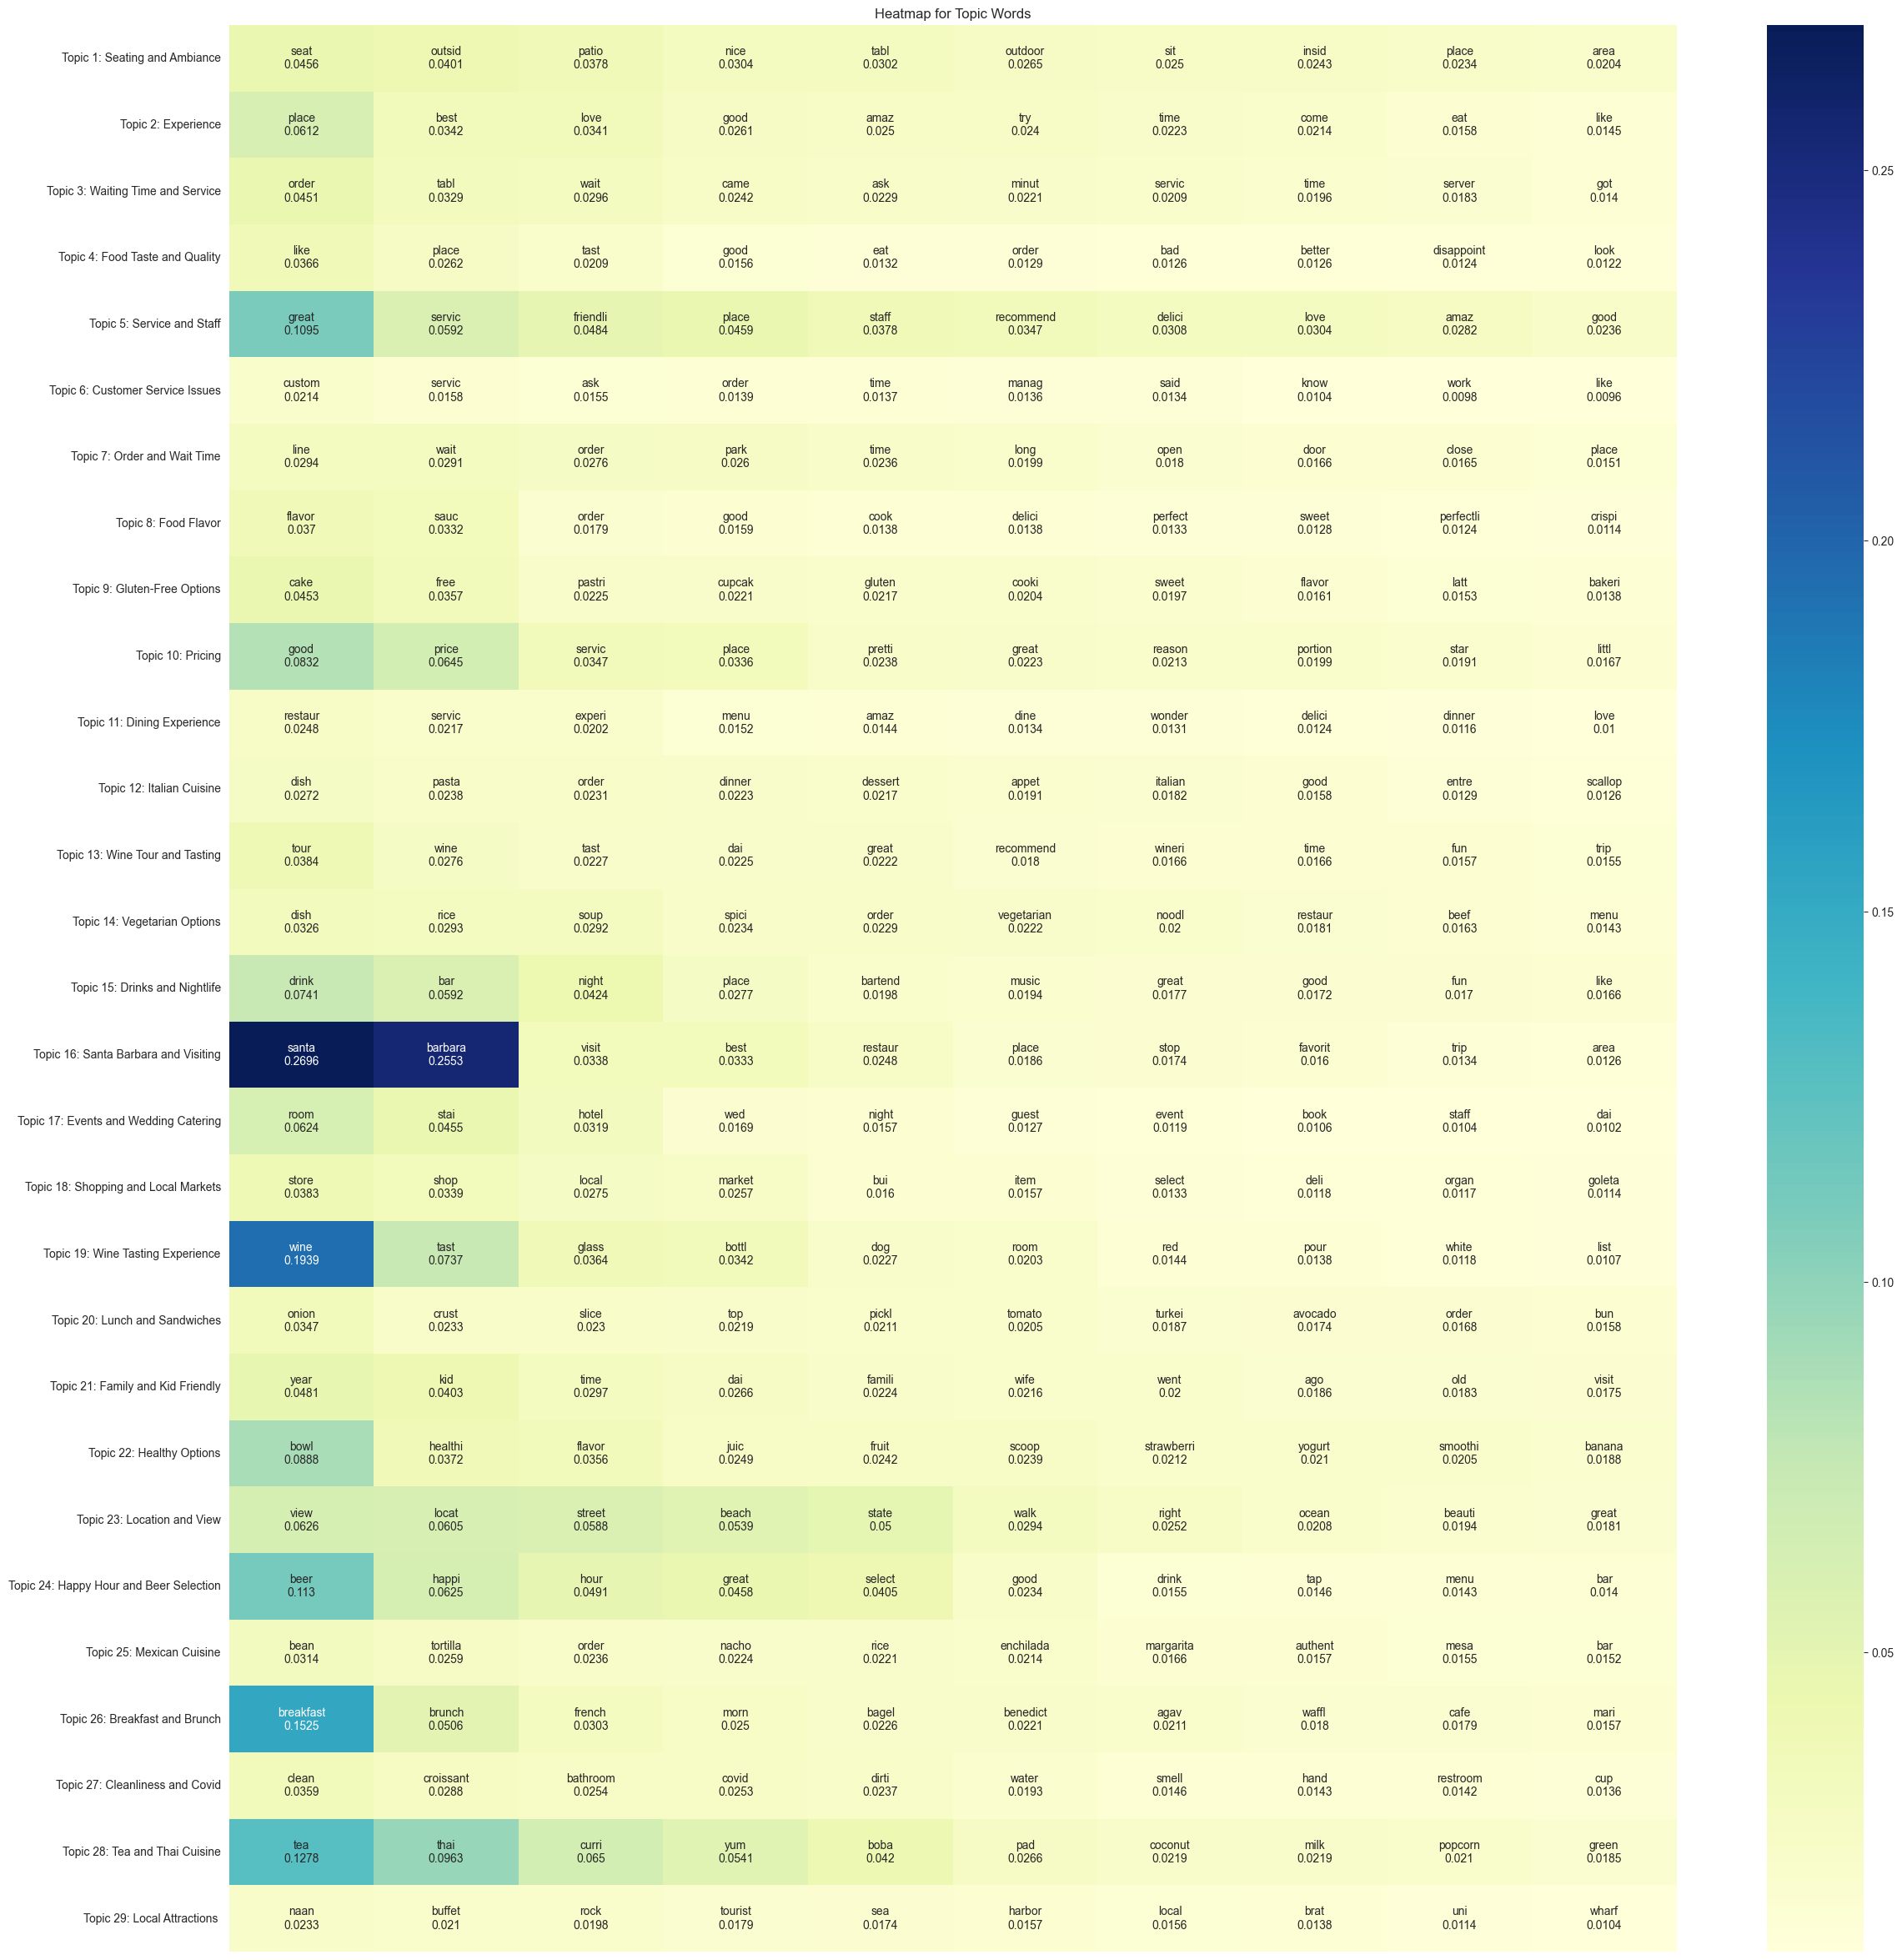

In [41]:
import seaborn as sns
def create_heatmap(top_topics, y_label):
    # avg_coherences = [f'Topic {idx+1}\n({round(i[1],2)})' for idx, i in enumerate(top_topics)]
    result_lst = []
    annot_lst = []
    for idx, row in enumerate(top_topics):
        result_lst.append([])
        annot_lst.append([])
        for j, k in row[0][:10]:
            result_lst[idx].append(round(j,4))
            annot_lst[idx].append(f'''{k}\n{str(round(j,4))}''')
    plt.figure(figsize=(28,30)) 
    plt.title("Heatmap for Topic Words")
    sns.heatmap(pd.DataFrame(result_lst),annot=pd.DataFrame(annot_lst),fmt='',cmap='YlGnBu',
               xticklabels = False, yticklabels = y_label)
LDA_topic_list = topics = [
    "Topic 1: Seating and Ambiance",
    "Topic 2: Experience",
    "Topic 3: Waiting Time and Service",
    "Topic 4: Food Taste and Quality",
    "Topic 5: Service and Staff",
    "Topic 6: Customer Service Issues",
    "Topic 7: Order and Wait Time",
    "Topic 8: Food Flavor",
    "Topic 9: Gluten-Free Options",
    "Topic 10: Pricing",
    "Topic 11: Dining Experience",
    "Topic 12: Italian Cuisine",
    "Topic 13: Wine Tour and Tasting",
    "Topic 14: Vegetarian Options",
    "Topic 15: Drinks and Nightlife",
    "Topic 16: Santa Barbara and Visiting",
    "Topic 17: Events and Wedding Catering",
    "Topic 18: Shopping and Local Markets",
    "Topic 19: Wine Tasting Experience",
    "Topic 20: Lunch and Sandwiches",
    "Topic 21: Family and Kid Friendly",
    "Topic 22: Healthy Options",
    "Topic 23: Location and View",
    "Topic 24: Happy Hour and Beer Selection",
    "Topic 25: Mexican Cuisine",
    "Topic 26: Breakfast and Brunch",
    "Topic 27: Cleanliness and Covid",
    "Topic 28: Tea and Thai Cuisine",
    "Topic 29: Local Attractions "
]


create_heatmap(LDA_optimal_model.top_topics(corpus_removed_labels), LDA_topic_list)

We are find some interesting topics: Topic 9 and Topic 14, Gluten-free and vegetarian option are popular in ca restaurants which are absent in our training dataset; Topic 27, cleanliness and covid is a new topic since 2019.People are more care about the Covid Precautions and cleanliness, which may be a new aspect for restaurants to consider.

** 21 Labels Extracted from LDA model:  Seating, Ambiance,Experience, Waiting Time, Service, Food Taste, Quality, Order, Food Flavor, Gluten-Free Options, Pricing, Vegetarian Options, Nightlife, Events and Setting, Good for Group, Kid friendly, Healthy Options, Location, View, Happy Hour, Cleanliness and Covid Precautions **

##### NMF Model

In [42]:
%%time
from gensim.models import Nmf
NMF_model_list, NMF_coherence_values = compute_coherence_values(modelname="NMF", dictionary=dictionary_removed_labels, corpus=corpus_removed_labels, texts=ca_df['tokens_removed_labels'], start=18, limit=31, step=1)

/opt/homebrew/Caskroom/miniconda/base/envs/capstone-proj/lib/python3.10/site-packages/gensim/models/nmf.py:578: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/homebrew/Caskroom/miniconda/base/envs/capstone-proj/lib/python3.10/site-packages/gensim/models/nmf.py:607: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/homebrew/Caskroom/miniconda/base/envs/capstone-proj/lib/python3.10/site-packages/gensim/models/nmf.py:620: DeprecationWarning: Please import `csc_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csc` namespace is deprecated and will be removed in SciPy 2.0.0.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/opt/ho

KeyboardInterrupt: 

Num Topics = 18  has Coherence Value of 0.4697
Num Topics = 19  has Coherence Value of 0.4607
Num Topics = 20  has Coherence Value of 0.4578
Num Topics = 21  has Coherence Value of 0.4621
Num Topics = 22  has Coherence Value of 0.4774
Num Topics = 23  has Coherence Value of 0.4688
Num Topics = 24  has Coherence Value of 0.4633
Num Topics = 25  has Coherence Value of 0.4599
Num Topics = 26  has Coherence Value of 0.4757
Num Topics = 27  has Coherence Value of 0.474
Num Topics = 28  has Coherence Value of 0.4625
Num Topics = 29  has Coherence Value of 0.4705
Num Topics = 30  has Coherence Value of 0.4721
Optimal Number of Topics: 22
(17, '0.015*"star" + 0.015*"menu" + 0.014*"better" + 0.014*"night" + 0.014*"price" + 0.013*"dinner" + 0.011*"friend" + 0.011*"thing" + 0.011*"experi" + 0.011*"hour" + 0.011*"happi" + 0.010*"meal" + 0.010*"review" + 0.007*"think" + 0.007*"wai"')
(7, '0.145*"like" + 0.023*"tast" + 0.013*"look" + 0.011*"feel" + 0.011*"flavor" + 0.008*"sauc" + 0.007*"think" + 0.0

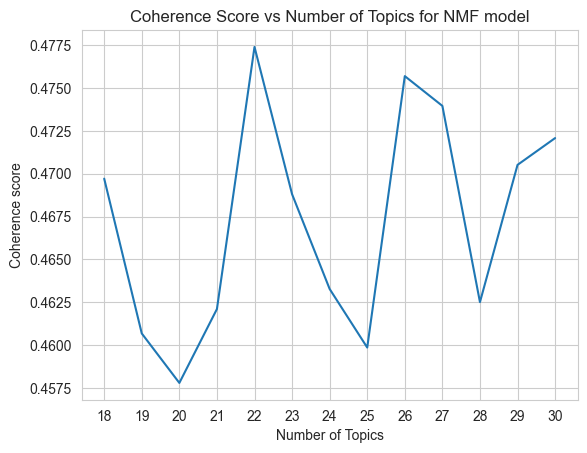

In [22]:
plot_coherences_topics("NMF", 18, 31, 1, NMF_model_list, NMF_coherence_values)

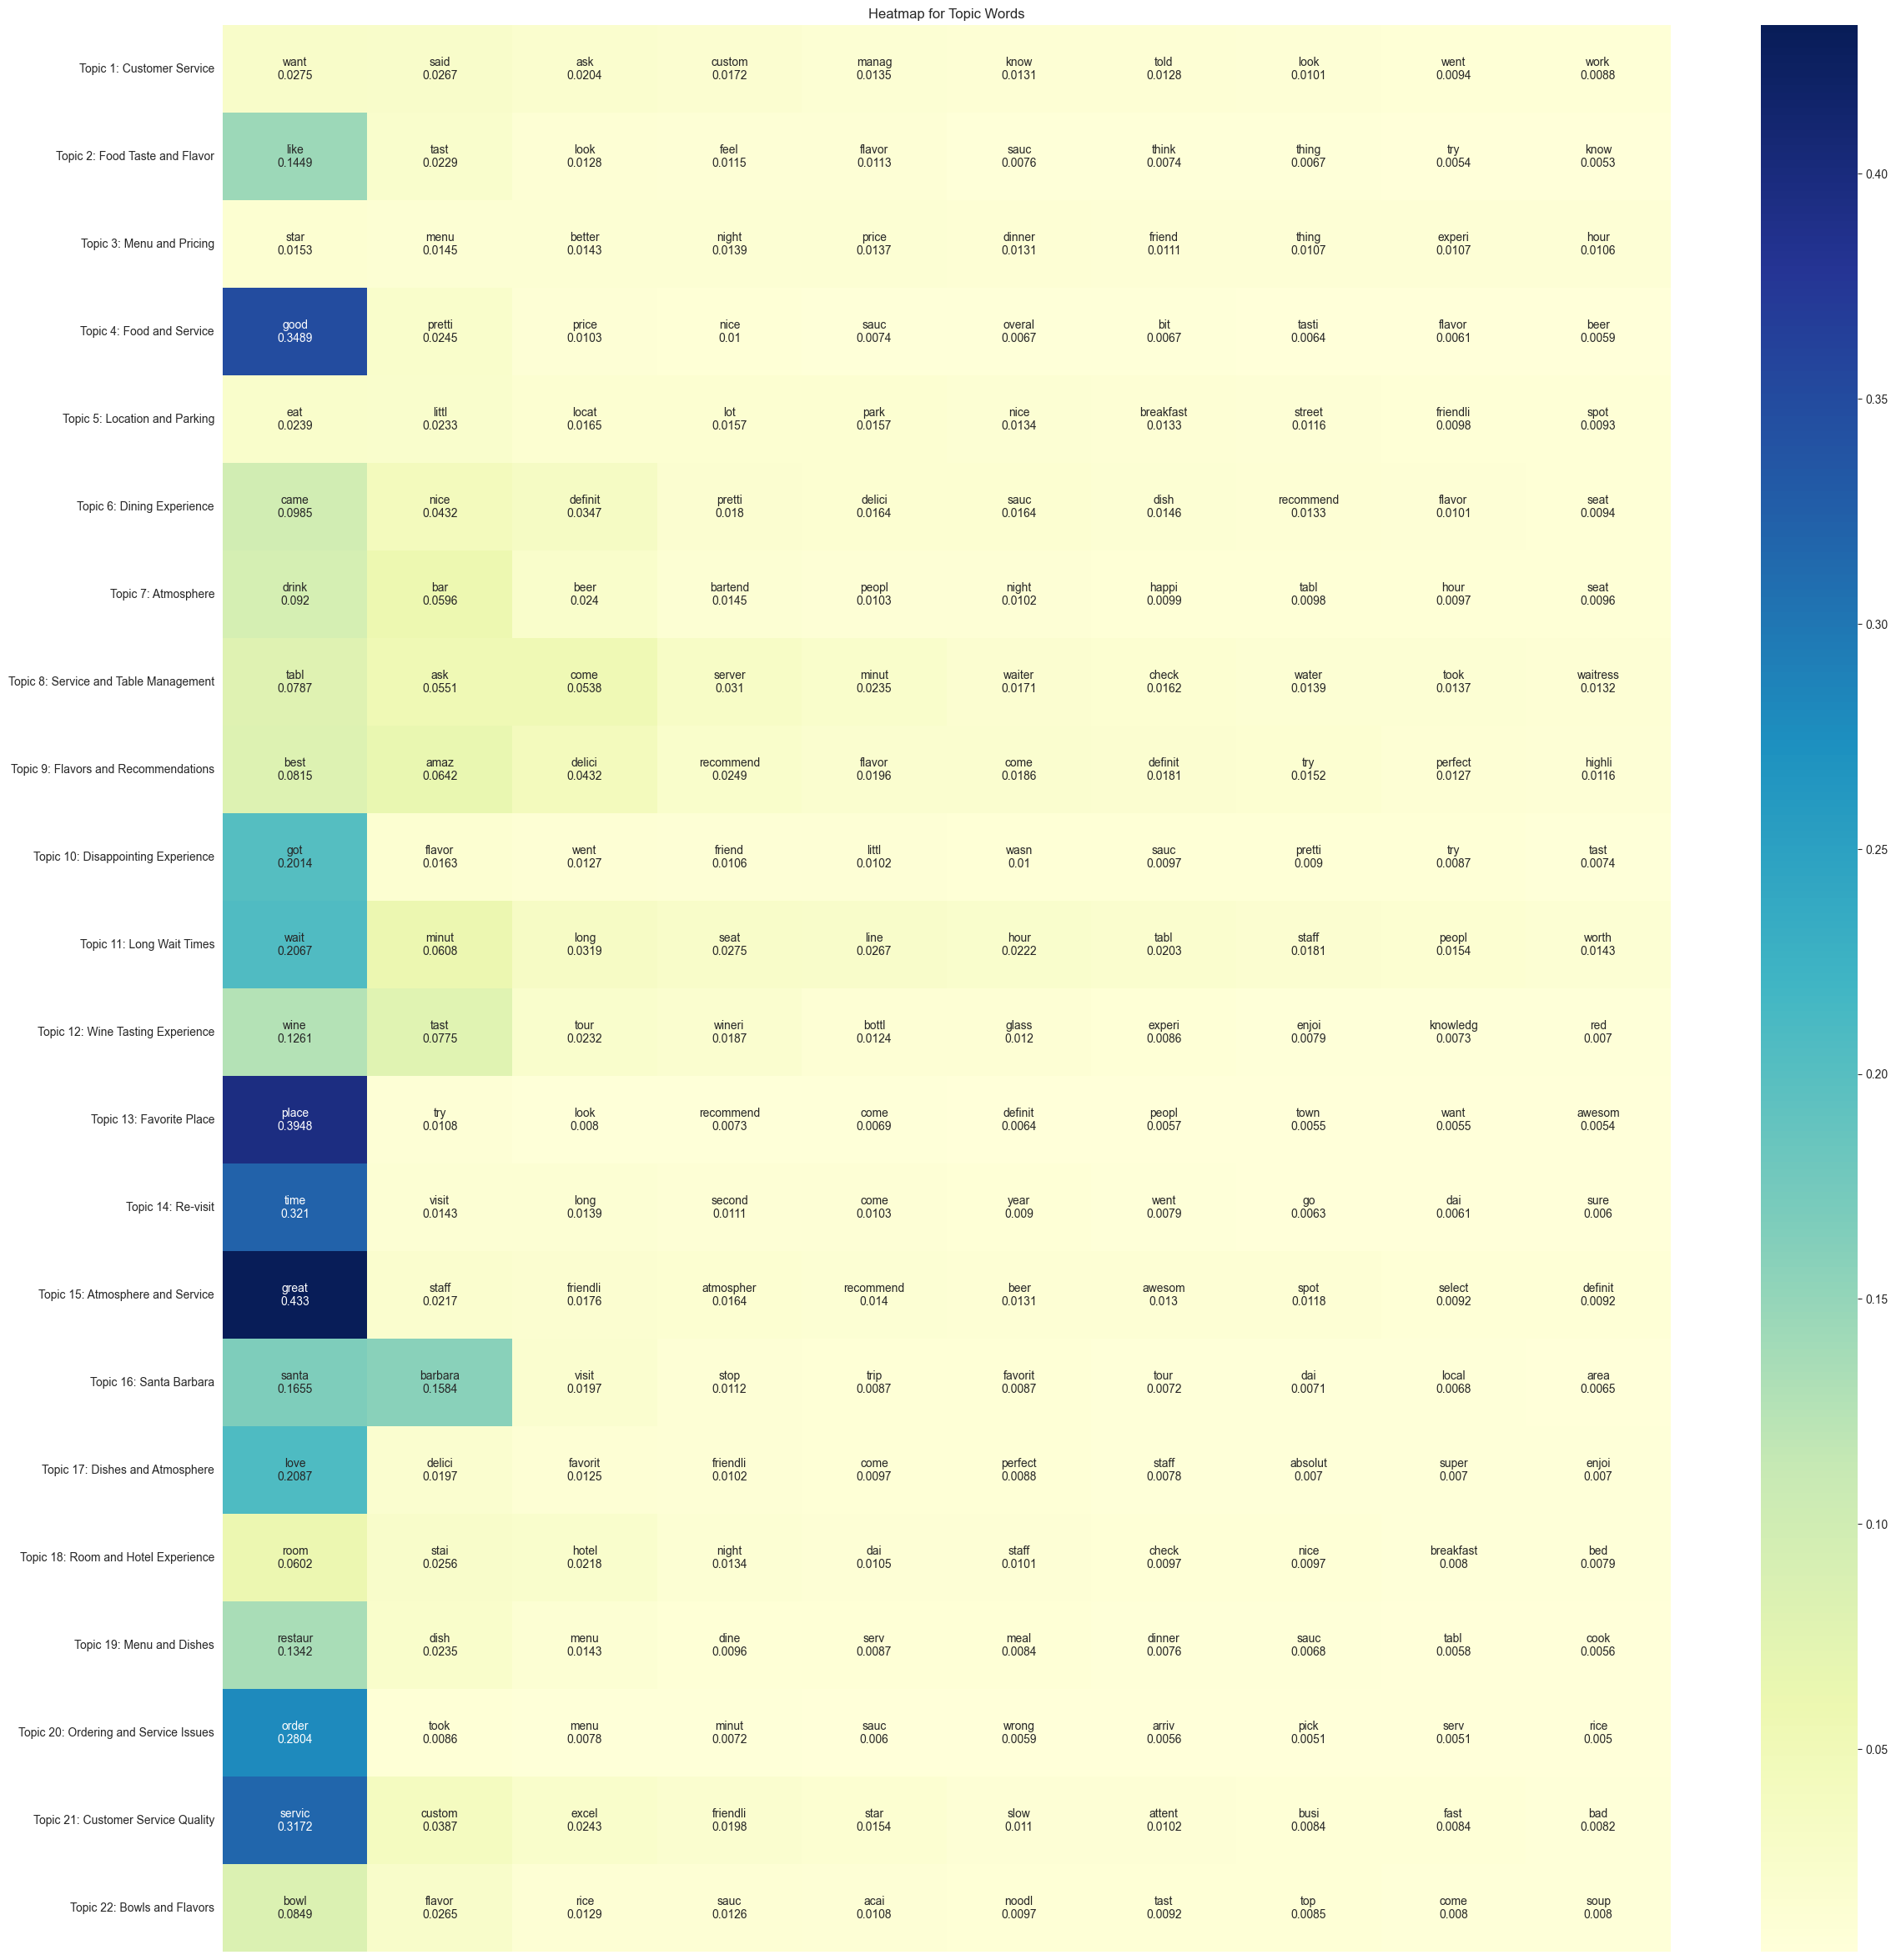

In [50]:
NMF_optimal_model = NMF_model_list[22-18]
NMF_topic_list = [
    "Topic 1: Customer Service",
    "Topic 2: Food Taste and Flavor",
    "Topic 3: Menu and Pricing",
    "Topic 4: Food and Service",
    "Topic 5: Location and Parking",
    "Topic 6: Dining Experience",
    "Topic 7: Atmosphere",
    "Topic 8: Service and Table Management",
    "Topic 9: Flavors and Recommendations",
    "Topic 10: Disappointing Experience",
    "Topic 11: Long Wait Times",
    "Topic 12: Wine Tasting Experience",
    "Topic 13: Favorite Place",
    "Topic 14: Re-visit",
    "Topic 15: Atmosphere and Service",
    "Topic 16: Santa Barbara",
    "Topic 17: Dishes and Atmosphere",
    "Topic 18: Room and Hotel Experience",
    "Topic 19: Menu and Dishes",
    "Topic 20: Ordering and Service Issues",
    "Topic 21: Customer Service Quality",
    "Topic 22: Bowls and Flavors"
]


create_heatmap(NMF_optimal_model.top_topics(corpus_removed_labels),NMF_topic_list)

As we can see, most of the topics in the NMF model are presented in LDA model. One more aspect we observed in NMF model is Topic 14 Re-Visit. FINAL_ASPECT_SET is: Seating, Ambiance,Experience, Waiting Time, Service, Food Taste, Quality, Order, Food Flavor, Gluten-Free Options, Pricing, Vegetarian Options, Nightlife, Events and Setting, Good for Group, Kid friendly, Healthy Options, Location, View, Happy Hour, Cleanliness and Covid Precautions, Re-Visit.